In [17]:
import numpy as np
from numpy import fft as fftengine
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits

In [18]:
name = 'hlsp_frontier_model_abell2744_cats_v4.1_kappa'
name = 'abell2744_mass_density'
input_map, header = pyfits.getdata(f"data/{name}.fits", header=True)

deg2arcsec = 60.0*60.0

pixel_size = np.abs(header['CDELT2'])
side_length_pixels = input_map.shape[0]
side_length_deg = pixel_size*side_length_pixels
side_length_arcsec = side_length_deg * deg2arcsec

print(side_length_arcsec)

1001.0010010010003


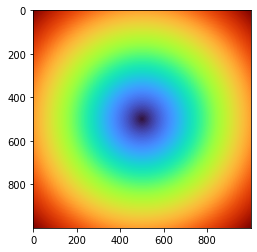

In [19]:
# Giulia's angular grid in arcsec
tet_1grid_old = np.append((0.1+10**(.065*np.arange(50))), 1533.0)
tet_1grid_new=np.zeros(24,dtype=float)
tet_1grid_new[0]=3.41131121e+00
tet_1grid_new[1]=7.09841996e+00
tet_1grid_new[2]=1.10647820e+01
tet_1grid_new[3]=1.48910839e+01
tet_1grid_new[4]=1.72790839e+01
tet_1grid_new[5:22]=tet_1grid_old[20:37]
tet_1grid_new[22]=3.98207171e+02
tet_1grid_new[23]=1.53300000e+03
tet_1grid=np.zeros(24,dtype=float)
tet_1grid=tet_1grid_new

kbins = 1.0/tet_1grid
kbins = np.flip(kbins)
scale = 1001.001 # width in arcsecs
kbins *= scale

y, x = np.indices((1000,1000))
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
r = np.hypot(x - center[0], y - center[1])

plt.imshow(r, cmap='turbo')
plt.show()

In [20]:
print(kbins)

[  0.65296869   2.5137694    4.57336692   5.31133889   6.16831878
   7.16347262   8.31904419   9.66084609  11.21882822  13.02773517
  15.12786628  17.56595335  20.3961736   23.68131725  27.49413174
  31.91886693  37.05304846  43.00950851  49.91870602  57.93136985
  67.22150024  90.46730428 141.01743848 293.43584867]


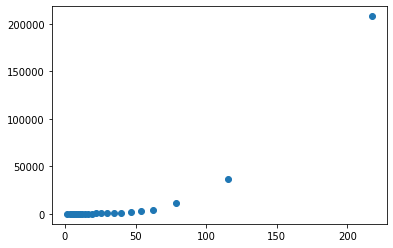

In [21]:
nr = np.histogram(r,kbins)[0]
bin_centers = 0.5*(kbins[1:]+kbins[:-1])

plt.plot(bin_centers, nr, 'o')
plt.show()

In [22]:
for x, n in zip(bin_centers, nr):
    print(f"{x:0.0f}: {n}")

2: 16
4: 52
5: 20
6: 32
7: 44
8: 52
9: 84
10: 92
12: 148
14: 184
16: 244
19: 328
22: 468
26: 584
30: 848
34: 1132
40: 1480
46: 2028
54: 2712
63: 3636
79: 11488
116: 36792
217: 207980


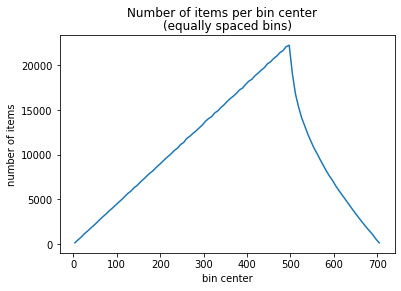

In [23]:
# evenly spaced bins
x,y = (500, 500)
rmax = np.hypot(x, y)
rbin = np.linspace(0, rmax+1, num=100)
rbin_center = 0.5*(rbin[1:] + rbin[:-1])
nr = np.histogram(r,rbin)[0]


plt.plot(rbin_center, nr)
plt.suptitle('Number of items per bin center')
plt.title('(equally spaced bins)')
plt.xlabel('bin center')
plt.ylabel('number of items')
plt.savefig("output/num_per_bin_eq_spaced.jpeg")
plt.show()

[  0.70710678 115.18029345 162.8572995  199.50563902 230.33128316
 257.51213564 282.09661466 304.71380015 325.74913661 345.50904474
 364.20118067 381.94829493 398.92417826 415.23065879 430.89731956
 446.01849737 460.64357154 474.82259845 488.61283241 502.15784371
 519.60610081 541.62579333 569.56518503 608.12210945 706.39967441]
[  0.70710678 115.18029345 162.8572995  199.50563902 230.33128316
 257.51213564 282.09661466 304.71380015 325.74913661 345.50904474
 364.20118067 381.94829493 398.92417826 415.23065879 430.89731956
 446.01849737 460.64357154 474.82259845 488.61283241 502.15784371
 519.60610081 541.62579333 569.56518503 608.12210945 706.39967441]
[ 57.94370012 139.01879648 181.18146926 214.91846109 243.9217094
 269.80437515 293.4052074  315.23146838 335.62909068 354.85511271
 373.0747378  390.43623659 407.07741853 423.06398917 438.45790846
 453.33103446 467.733085   481.71771543 495.38533806 510.88197226
 530.61594707 555.59548918 588.84364724 657.26089193]
17.27538969679427


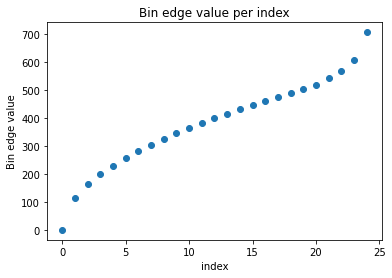

In [24]:
# function to calculate equal-frequency bins
def get_bins(data, nbin):
    data = data.flatten()
    x = np.linspace(0, len(data), nbin + 1)
    return np.interp(x,
                     np.arange(len(data)),
                     np.sort(data))

rbins = get_bins(r, 24)
print(rbins)
#rbins[0] = 0
#rbins = np.insert(rbins, 1, np.linspace(rbins[0], rbins[1], num=30, endpoint=False)[1:])
rbin_center = 0.5*(rbins[1:]+rbins[:-1])
print(rbins)
print(rbin_center)
print(1001/rbin_center[0])
plt.plot(rbins, 'o')
plt.title('Bin edge value per index')
plt.xlabel('index')
plt.ylabel('Bin edge value')
plt.show()

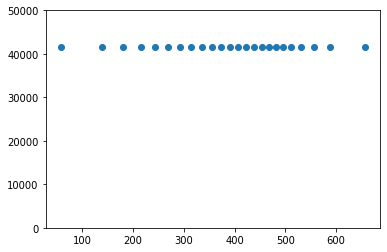

In [25]:
nr = np.histogram(r,rbins)[0]

plt.plot(rbin_center, nr, 'o')
plt.ylim(0, np.max(nr)*1.2)
plt.show()

In [26]:
for x, n in zip(rbin_center, nr):
    print(f"{x:0.0f}: {n}")

58: 41660
139: 41672
181: 41656
215: 41672
244: 41660
270: 41676
293: 41664
315: 41668
336: 41664
355: 41672
373: 41656
390: 41680
407: 41664
423: 41620
438: 41688
453: 41668
468: 41688
482: 41672
495: 41652
511: 41680
531: 41656
556: 41672
589: 41668
657: 41672


In [27]:
scale = 1001.001 # width in arcsecs
#rbin_center_scaled *= scale
theta = 1.0/rbin_center * scale
theta = np.flip(theta)
print(theta)

[ 1.52298883  1.69994362  1.80167229  1.88648872  1.95935863  2.02065124
  2.07798254  2.1401116   2.20810164  2.28300364  2.3660747   2.45899417
  2.56380148  2.68311118  2.82087242  2.98246197  3.17544757  3.41166746
  3.71009921  4.10377987  4.657585    5.52485309  7.20047235 17.27540695]


In [28]:
xymax = 1000
rmax = np.sqrt(2*(xymax/2.0)**2)


kfreq = fftengine.fftfreq(xymax)*xymax
kfreq = fftengine.fftshift(kfreq)
kfreq2D = np.meshgrid(kfreq, kfreq)
kfreq_norm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)


In [39]:
def check_kbins(kbins):
    for i, k in enumerate(kbins):
        for j, l in enumerate(kbins[:i]):
            if k < l:
                return (i, j)
    return None

In [43]:
import numpy as np
thetaa_g = np.array([632.19689975, 300.48391331, 202.5353146,  174.39561856, 150.16751608,
 129.30727119, 111.34673066,  95.88281746,  82.56848478,  71.1049275,
  61.23487627,  52.7368238,   45.42005366,  39.12036024,  33.69636351,
  29.02633614,  25.00547167,  21.54353239,  18.56282422,  15.99645297,
  12.69590448,   8.64852679,   4.60809495])
kbina_g = 1/thetaa_g
print(kbina_g)

[0.0025     0.00502513 0.00553908 0.00573409 0.00665923 0.00773352
 0.00898096 0.0104294  0.01211116 0.01406372 0.01633056 0.01896208
 0.02201671 0.02556214 0.02967679 0.03445147 0.03999125 0.04641764
 0.05387111 0.06251386 0.07876556 0.11562663 0.21700942]


In [34]:
kbins_g = np.array([0.00065232, 0.00251126, 0.00456879, 0.00530603, 0.00616215, 0.00715631,
 0.00831073, 0.00965119, 0.01120761, 0.01301471, 0.01511274, 0.01754839,
 0.02037578, 0.02365764, 0.02746664, 0.03188695, 0.037016,   0.0429665,
 0.04986879, 0.05787344, 0.06715428, 0.09037684, 0.14087642, 0.29314241])

In [35]:
kbina_g_ = 0.5*(kbins_g[1:]+kbins_g[:-1])
print(kbina_)

[0.00158179 0.00354002 0.00493741 0.00573409 0.00665923 0.00773352
 0.00898096 0.0104294  0.01211116 0.01406372 0.01633056 0.01896209
 0.02201671 0.02556214 0.02967679 0.03445147 0.03999125 0.04641765
 0.05387111 0.06251386 0.07876556 0.11562663 0.21700942]


0.00065 0.00065
0.00435 0.00251
0.00570 0.00457
0.00538 0.00531
0.00609 0.00616
0.00723 0.00716
0.00824 0.00831
0.00972 0.00965
0.01114 0.01121
0.01308 0.01301
0.01504 0.01511
0.01762 0.01755
0.02031 0.02038
0.02373 0.02366
0.02740 0.02747
0.03196 0.03189
0.03695 0.03702
0.04304 0.04297
0.04980 0.04987
0.05794 0.05787
0.06708 0.06715
0.09045 0.09038
0.14081 0.14088
0.29321 0.29314
(3, 2)


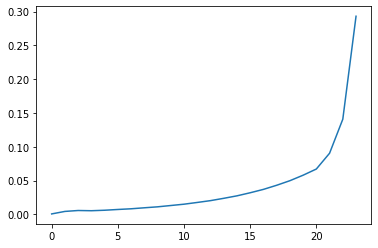

In [42]:
# given thetaa, reconstruct rbins
kbins = np.zeros(kbins_g.size)

kbins[0] = kbins_g[0]

for i in range(0, thetaa_g.size):
    kbins[i+1] = 2.0/thetaa_g[i] - kbins[i]

for a, b in zip(kbins, kbins_g):
    print(f"{a:0.5f} {b:0.5f}")
    
print(check_kbins(kbins))
plt.plot(kbins)

In [51]:
thetaa = np.array([500, 200, 100, 50, 10, 5, 1])

kbins = np.zeros(thetaa.size+1)

kbins[0] = 0.0

for i in range(0, thetaa.size):
    kbins[i+1] = 2.0/thetaa[i] - kbins[i]


print(kbins)
print(check_kbins(kbins))

[0.    0.004 0.006 0.014 0.026 0.174 0.226 1.774]
None


In [53]:
x = 3**np.arange(20)
print(x)

[         1          3          9         27         81        243
        729       2187       6561      19683      59049     177147
     531441    1594323    4782969   14348907   43046721  129140163
  387420489 1162261467]
